# GLM via SKLearn

Please email: Joshua_Zimmer@hms.harvard.edu with questions

In [55]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
import sys
sys.path.append('./backend')

import sglm
import sglm_cv
import sklearn.linear_model
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

# Normal (OLS)

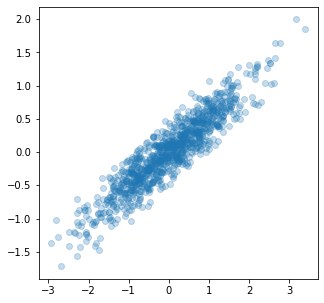

In [38]:
norm = stats.norm()

true_x = norm.rvs(size=1000)
true_y = true_x * 0.5
obs_y = (true_y + norm.rvs(size=1000)*0.2)

x = true_x[:,None]
y = obs_y

plt.figure(figsize=(5,5))
plt.scatter(x, y, alpha = 0.25)

In [39]:
# glm = sglm.GLM('Normal')
# glm = sklearn.linear_model.LinearRegression()
glm = sglm.GLM('Normal', alpha=0)
glm.fit(x, y)
coef, intercept = glm.model.coef_, glm.model.intercept_
coef, intercept

(array([0.50060945]), 0.004122437334904978)

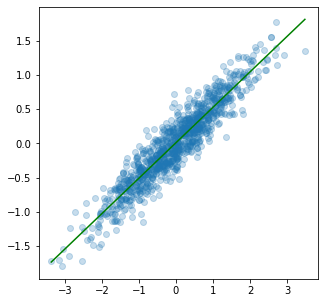

In [5]:
view_x = np.linspace(x.min(), x.max(), num=100)
view_y = view_x*coef + intercept
obs_y = (true_y + norm.rvs(size=1000)*0.)

plt.figure(figsize=(5,5))
plt.scatter(x[:,0], y, alpha = 0.25)
plt.plot(view_x, np.squeeze(view_y), color='g')

# Poisson

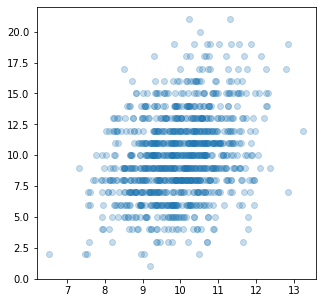

In [6]:
true_x = norm.rvs(size=1000) + 10
true_y = true_x
obs_y = np.array([stats.poisson(mu=_).rvs(1) for _ in true_x]).reshape(-1)

x = true_x[:,None]
y = obs_y

plt.figure(figsize=(5,5))
plt.scatter(x, y, alpha = 0.25)

In [7]:
glm = sglm.GLM('Poisson', alpha=0, link='identity')
glm.fit(x, y)
coef, intercept = glm.model.coef_, glm.model.intercept_
coef, intercept

(array([1.09078001]), -0.9325434231154646)

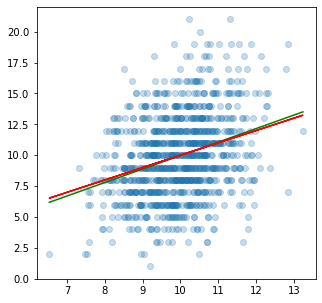

In [8]:
view_x = np.linspace(x.min(), x.max(), num=100)
# view_y = np.exp(view_x*coef + intercept)
view_y = view_x*coef + intercept

plt.figure(figsize=(5,5))
plt.scatter(x[:,0], y, alpha = 0.25)
plt.plot(view_x, np.squeeze(view_y), color='g')
plt.plot(true_x, np.squeeze(true_y), color='r')

# Logistic

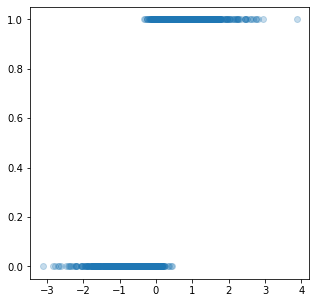

In [9]:
norm = stats.norm()

true_x = norm.rvs(size=1000)
true_y = true_x * 0.5
obs_y = ((true_y + norm.rvs(size=1000)*0.1) > 0)*1.0

x = true_x[:,None]
y = obs_y

plt.figure(figsize=(5,5))
plt.scatter(x, y, alpha = 0.25)

In [10]:
glm = sglm.GLM('Logistic')
glm.fit(x, y)
coef, intercept = glm.model.coef_, glm.model.intercept_
coef, intercept

(array([[6.36462321]]), array([0.03763397]))

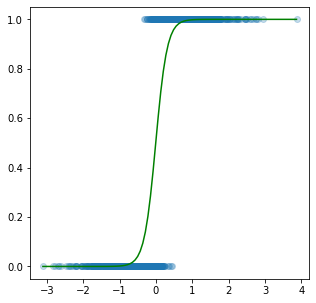

In [11]:
view_x = np.linspace(x.min(), x.max(), num=100)
view_y = 1/(1+np.exp(-(view_x*coef + intercept)))

plt.figure(figsize=(5,5))
plt.scatter(x[:,0], y, alpha = 0.25)
plt.plot(view_x, np.squeeze(view_y), color='g')

# Normal (OLS) - CV

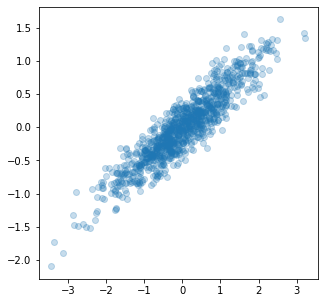

In [12]:
norm = stats.norm()

true_x = norm.rvs(size=1000)
true_y = true_x * 0.5
obs_y = (true_y + norm.rvs(size=1000)*0.2)

x = true_x[:,None]
y = obs_y

plt.figure(figsize=(5,5))
plt.scatter(x, y, alpha = 0.25)

In [41]:
import sklearn.model_selection

ss = sklearn.model_selection.ShuffleSplit()

In [42]:
# for sss in ss.split(x, y):
#     for isss in sss:
#         print(isss.shape)
#     break

inx = list(ss.split(x, y))

In [43]:
inx

[(array([560, 520, 595, 523, 534, 177, 896, 581, 839, 186, 779,  18, 956,
         114, 899, 291, 328, 169, 300, 592, 546, 926, 356, 489, 264,  74,
          97, 257,  45,  32, 927, 117, 541, 861, 883, 822, 918, 584, 107,
          21, 366, 227, 316, 891, 757, 636, 399, 672, 808, 474, 863, 700,
         777, 201, 711,  93, 829, 793, 869, 512, 312, 625, 458, 833, 726,
         465, 953, 968, 191, 702, 871, 760, 864, 511, 834, 670, 327, 120,
          62, 147, 650, 484, 671, 935, 787, 197,  34, 221, 844, 578,  87,
         414, 628, 547, 741, 164, 729, 156, 826, 175, 281, 549, 453, 745,
         848, 755, 136, 100, 976, 885,  47, 812, 391, 658, 843, 206, 800,
         815, 768, 874, 471, 685, 409, 901, 652, 357, 195, 769, 375, 161,
          16, 256,  88, 282, 984, 335, 596,  26, 841, 405, 993, 770, 143,
         905, 472, 629, 659, 558, 665, 378, 931, 386, 160, 571, 330, 634,
         239, 620, 553, 942, 669, 455,   3, 964, 172, 866, 459, 146, 298,
         443, 213, 675, 564, 307, 486,

In [47]:

# glm = sglm.GLM('Normal', alpha=0)
# glm.fit(x, y)

sglm_cv.cv_glm_single_params(x, y, inx, 'Gaussian', {'alpha': 0})



(array([[0.50056487, 0.49831869, 0.49949482, 0.5011787 , 0.50323776,
         0.49880997, 0.50341827, 0.50663963, 0.49797395, 0.50003329]]),
 array([ 0.0052819 ,  0.00304714,  0.00141391,  0.00276917,  0.00571923,
         0.00169791, -0.00085994,  0.0077852 ,  0.00252619,  0.00417229]),
 array([0.85457129, 0.85866603, 0.85201922, 0.85359661, 0.85509811,
        0.85218822, 0.85662812, 0.85560062, 0.84885296, 0.8548702 ]),
 array([0.85130636, 0.80710002, 0.87284064, 0.85974574, 0.84554445,
        0.86559702, 0.82690102, 0.83796542, 0.89663172, 0.84876804]))

In [69]:

param_list = sglm_cv.generate_mult_params(
                                          {
                                           'alpha': [0,0.01,0.1,1],
                                           'roll': [0,1,2,3,4]
                                          },
                                          kwargs={'fit_intercept': True}
                                         )



In [70]:
param_list

[{'fit_intercept': True, 'alpha': 0, 'roll': 0},
 {'fit_intercept': True, 'alpha': 0, 'roll': 1},
 {'fit_intercept': True, 'alpha': 0, 'roll': 2},
 {'fit_intercept': True, 'alpha': 0, 'roll': 3},
 {'fit_intercept': True, 'alpha': 0, 'roll': 4},
 {'fit_intercept': True, 'alpha': 0.01, 'roll': 0},
 {'fit_intercept': True, 'alpha': 0.01, 'roll': 1},
 {'fit_intercept': True, 'alpha': 0.01, 'roll': 2},
 {'fit_intercept': True, 'alpha': 0.01, 'roll': 3},
 {'fit_intercept': True, 'alpha': 0.01, 'roll': 4},
 {'fit_intercept': True, 'alpha': 0.1, 'roll': 0},
 {'fit_intercept': True, 'alpha': 0.1, 'roll': 1},
 {'fit_intercept': True, 'alpha': 0.1, 'roll': 2},
 {'fit_intercept': True, 'alpha': 0.1, 'roll': 3},
 {'fit_intercept': True, 'alpha': 0.1, 'roll': 4},
 {'fit_intercept': True, 'alpha': 1, 'roll': 0},
 {'fit_intercept': True, 'alpha': 1, 'roll': 1},
 {'fit_intercept': True, 'alpha': 1, 'roll': 2},
 {'fit_intercept': True, 'alpha': 1, 'roll': 3},
 {'fit_intercept': True, 'alpha': 1, 'roll':

In [67]:
sglm_cv.cv_glm_mult_params(x, y, inx, 'Gaussian', param_list)

[(array([[0.50056487, 0.49831869, 0.49949482, 0.5011787 , 0.50323776,
          0.49880997, 0.50341827, 0.50663963, 0.49797395, 0.50003329]]),
  array([ 0.0052819 ,  0.00304714,  0.00141391,  0.00276917,  0.00571923,
          0.00169791, -0.00085994,  0.0077852 ,  0.00252619,  0.00417229]),
  array([0.85457129, 0.85866603, 0.85201922, 0.85359661, 0.85509811,
         0.85218822, 0.85662812, 0.85560062, 0.84885296, 0.8548702 ]),
  array([0.85130636, 0.80710002, 0.87284064, 0.85974574, 0.84554445,
         0.86559702, 0.82690102, 0.83796542, 0.89663172, 0.84876804])),
 (array([[-0.00584201, -0.00867671, -0.00753223, -0.00611947, -0.01009583,
          -0.00967669, -0.00549531, -0.01608122, -0.01213245, -0.00927409]]),
  array([-0.01025605,  0.01249163,  0.00515908,  0.01038255,  0.00455999,
          0.00069868,  0.01354235,  0.00582359,  0.00432791,  0.00753239]),
  array([0.00011728, 0.00025771, 0.00019839, 0.00012908, 0.00034121,
         0.00031229, 0.00010139, 0.00087264, 0.0004998